In [1]:
#Importing all the libraries 
import csv
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline


In [2]:
listings_1=pd.read_csv("/Users/jennbrockman/Desktop/Ireland/data/listings1.csv",encoding = 'utf-8')

/Users/jennbrockman/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Listing the original dataset
listings_1=listings_1.set_index('id')

In [4]:
#Listing the data types of each column
listings_1.dtypes

listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
summary                                          object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 105, dtype: object

In [5]:
listings_1

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
44077,https://www.airbnb.com/rooms/44077,2.019110e+13,11/26/19,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,...,t,f,moderate,t,t,3,0,3,0,2.07
85148,https://www.airbnb.com/rooms/85148,2.019110e+13,11/26/19,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,NaN,...,f,f,flexible,f,f,1,0,1,0,0.15
85156,https://www.airbnb.com/rooms/85156,2.019110e+13,11/26/19,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",We are always prepared to go the extra mile so...,...,t,f,moderate,t,t,3,0,3,0,1.64
121030,https://www.airbnb.com/rooms/121030,2.019110e+13,11/26/19,Comfy double room in central area 1,Welcoming victorian house. Breakfast included....,"Double room 1 upstairs,wooden floors, desk, in...",Welcoming victorian house. Breakfast included....,social,"My neighbourhood is very safe, friendly and o...",I can help you with questions about history an...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.07
159889,https://www.airbnb.com/rooms/159889,2.019110e+13,11/26/19,Friendly Single Room,washing can be done at a cost of five euro per...,Nice comfortable house 20 minutes from the Cit...,washing can be done at a cost of five euro per...,none,plenty of buses into the city and the area is ...,we also do a departure run to the airport at a...,...,t,f,strict_14_with_grace_period,f,t,3,0,3,0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40369511,https://www.airbnb.com/rooms/40369511,2.019110e+13,11/26/19,Lovely house in the heart of Glasthule,An inviting and cosy two bed terraced house in...,Beautiful seaside walks and incredible food & ...,An inviting and cosy two bed terraced house in...,none,Nestled between the busy towns of Dun Laoghair...,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
40373285,https://www.airbnb.com/rooms/40373285,2.019110e+13,11/26/19,Cosy House beside Dublin City,Welcome to our home! Ideal room for a solo tra...,Both Bedrooms have a double bed and wardrobe s...,Welcome to our home! Ideal room for a solo tra...,none,"Drumcondra, County Dublin, Ireland Croke Park,...",NaN,...,f,f,moderate,f,f,1,1,0,0,NaN
40373911,https://www.airbnb.com/rooms/40373911,2.019110e+13,11/26/19,Cozy Family Home 10 min drive to Blanchardstow...,Cozy 3 bed semi-d beside clonee village with l...,NaN,Cozy 3 bed semi-d beside clonee village with l...,none,Quite leafy suburban location 25mins from city...,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN


In [6]:
# Checking the statistics of the columns
listings_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
scrape_id,9437.0,2.019110e+13,0.000000e+00,2.019110e+13,2.019110e+13,2.019110e+13,2.019110e+13,2.019110e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,9437.0,8.923157e+07,8.296647e+07,4.398400e+04,2.279928e+07,5.676244e+07,1.401056e+08,3.120656e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,9427.0,6.104593e+00,3.879246e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.760000e+02
host_total_listings_count,9427.0,6.104593e+00,3.879246e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.760000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,9437.0,5.334570e+01,4.353452e-02,5.320836e+01,5.333036e+01,5.334398e+01,5.335745e+01,5.361436e+01


In [7]:
#Creating another dataframe
listings=listings_1

In [8]:
#Converting price to a float
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '').astype('float64')

price                                           1.000000
square_feet                                     0.496691
accommodates                                    0.246697
bedrooms                                        0.231114
bathrooms                                       0.213303
beds                                            0.199820
guests_included                                 0.102845
host_id                                         0.059343
maximum_nights                                  0.052470
availability_365                                0.042627
calculated_host_listings_count_entire_homes     0.041113
calculated_host_listings_count                  0.028212
review_scores_location                          0.026195
maximum_minimum_nights                          0.025315
reviews_per_month                               0.024415
minimum_nights_avg_ntm                          0.021886
maximum_maximum_nights                          0.021356
availability_60                

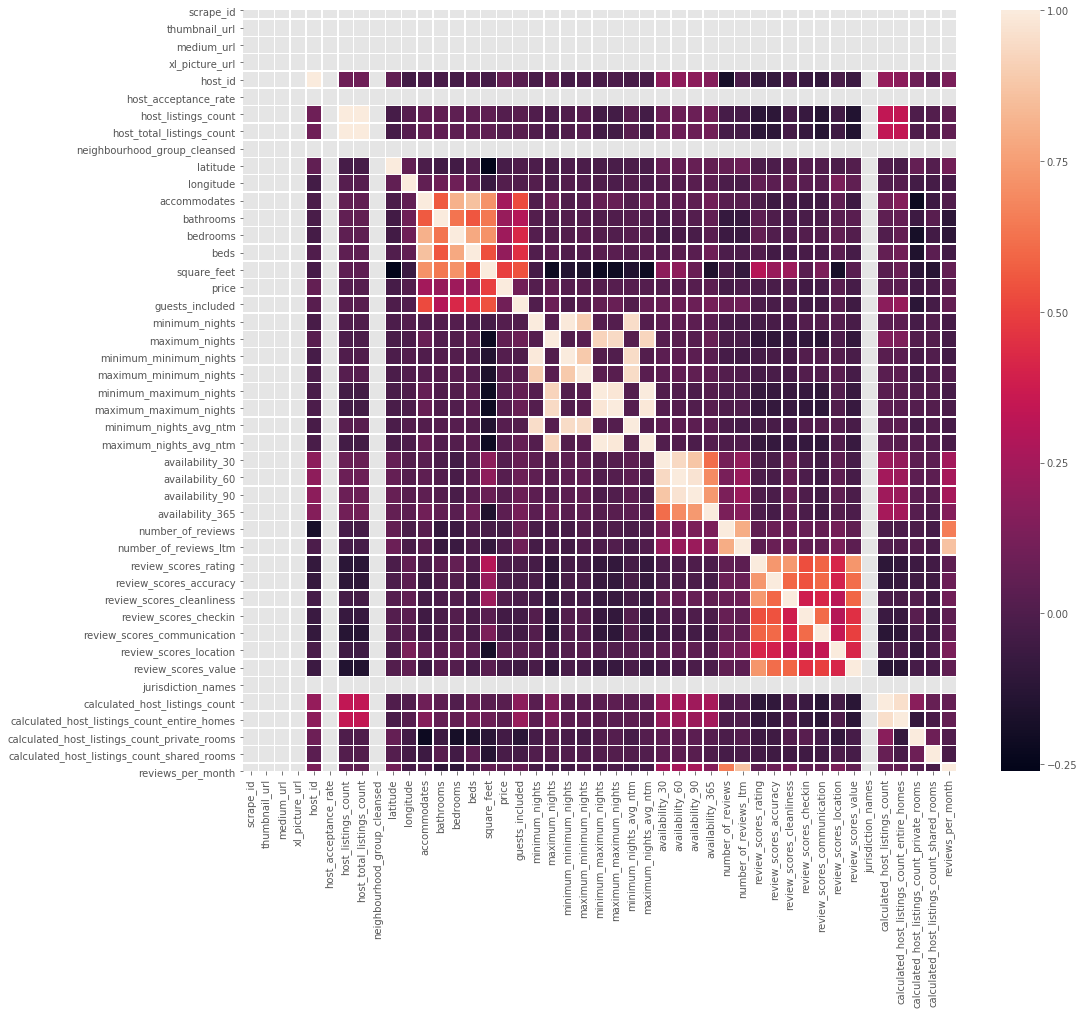

In [9]:
#Correlation Matrix to see the most correlated features with price
fig, ax = plt.subplots(figsize=(16,14))
corr = listings.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [10]:
#Based on the above correlations and a sense test, we select the follwing features for our models
listings.head()
selected_columns = [
                'id',
                'host_response_rate',
                'host_is_superhost',
                'zipcode',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'guests_included',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value'
]

listings.drop( 
    [key for key in listings.keys() if key not in selected_columns] ,
    axis=1, 
    inplace=True)

#Since amenities is a textual feature, and we know longer the amenities means more the amenities which should be directly correlated to the price. So calculating the length of the amenities
listings.loc[:,'amenities_length'] = listings['amenities'].str.len()

#Dropping the original amenities column
listings = listings.drop(['amenities'], 1)

In [11]:
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from ipykernel import kernelapp as app
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jennbrockman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
reviews = pd.read_csv("/Users/jennbrockman/Desktop/Ireland/data/reviews1.csv")
reviews  = reviews.dropna()
reviews.head()
reviews=reviews.set_index('listing_id')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviews['polarity_value']="Default"
reviews['neg']=0.0
reviews['pos']=0.0
reviews['neu']=0.0
reviews['compound']=0.0
for index,row in reviews.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviews.set_value(index,'polarity_value',ss)
    reviews.set_value(index,'neg',ss['neg'])
    reviews.set_value(index,'pos',ss['pos'])
    reviews.set_value(index,'neu',ss['neu'])
    reviews.set_value(index,'compound',ss['compound'])

/Users/jennbrockman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/jennbrockman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/jennbrockman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/jennbrockman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jennbrockman/opt/anaconda3/lib/python3

In [ ]:
reviews.head()


In [ ]:
rscore=reviews.groupby('listing_id')['compound'].mean()

In [ ]:
rscore

In [ ]:
#Joining the two dataframes by ID 
listings_final = pd.concat([listings, rscore], axis=1, join='inner')

In [107]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
44077,100%,t,Dublin 14,Bungalow,Private room,2,1.5,1.0,2.0,Real Bed,...,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,633,0.8555
85148,100%,f,NaN,House,Private room,2,NaN,1.0,1.0,Real Bed,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,0.0000
85156,100%,t,Dublin 14,Bungalow,Private room,2,1.5,1.0,1.0,Real Bed,...,1,96.0,10.0,10.0,10.0,10.0,9.0,10.0,637,0.4215
121030,83%,f,Dublin 4,House,Private room,2,2.0,1.0,1.0,Real Bed,...,1,94.0,9.0,9.0,10.0,9.0,9.0,9.0,210,0.8547
159889,100%,f,Dublin 9,House,Private room,1,2.0,3.0,6.0,Real Bed,...,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,488,0.8687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40105183,100%,f,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,217,0.9654
40115872,100%,f,NaN,House,Private room,2,1.0,0.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,8.0,10.0,121,0.8350
40225192,100%,f,D05 FH39,House,Private room,2,2.5,1.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,281,0.9746
40232557,100%,f,D09 YK11,House,Private room,2,1.5,1.0,1.0,Real Bed,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255,0.0000


In [108]:

#Converting the true/false values to binary 0/1
listings_final['host_is_superhost'].replace('t',1, inplace=True)
listings_final['host_is_superhost'].replace('f',0, inplace=True)

#Converting acceptance/response percentages to numbers
listings_final['host_response_rate'] = listings_final['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00

In [109]:
#Recoding property_type values 
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

listings_final['property_type'] = listings_final['property_type'].apply(recode)

In [110]:
#Recoding bed_type values
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

listings_final['bed_type'] = listings_final['bed_type'].apply(recode)

In [112]:
#Filling the empty values in the columns
listings_final['bathrooms'].fillna(method='ffill', inplace=True)
listings_final['bedrooms'].fillna(method='ffill', inplace=True)
listings_final['beds'].fillna(method='ffill', inplace=True)
listings_final['host_is_superhost'].fillna(value=0,inplace=True)
listings_final['host_response_rate'].fillna(value=0,inplace=True)

In [113]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
44077,1.00,1.0,Dublin 14,Other,Private room,2,1.5,1.0,2.0,Real Bed,...,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,633,0.8555
85148,1.00,0.0,NaN,House,Private room,2,1.5,1.0,1.0,Real Bed,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,0.0000
85156,1.00,1.0,Dublin 14,Other,Private room,2,1.5,1.0,1.0,Real Bed,...,1,96.0,10.0,10.0,10.0,10.0,9.0,10.0,637,0.4215
121030,0.83,0.0,Dublin 4,House,Private room,2,2.0,1.0,1.0,Real Bed,...,1,94.0,9.0,9.0,10.0,9.0,9.0,9.0,210,0.8547
159889,1.00,0.0,Dublin 9,House,Private room,1,2.0,3.0,6.0,Real Bed,...,1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,488,0.8687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40105183,1.00,0.0,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,217,0.9654
40115872,1.00,0.0,NaN,House,Private room,2,1.0,0.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,8.0,10.0,121,0.8350
40225192,1.00,0.0,D05 FH39,House,Private room,2,2.5,1.0,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,281,0.9746
40232557,1.00,0.0,D09 YK11,House,Private room,2,1.5,1.0,1.0,Real Bed,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255,0.0000


In [114]:
listings_final.isna().sum()

host_response_rate                0
host_is_superhost                 0
zipcode                        3865
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
guests_included                   0
review_scores_rating            151
review_scores_accuracy          161
review_scores_cleanliness       159
review_scores_checkin           165
review_scores_communication     158
review_scores_location          162
review_scores_value             165
amenities_length                  0
compound                          0
dtype: int64

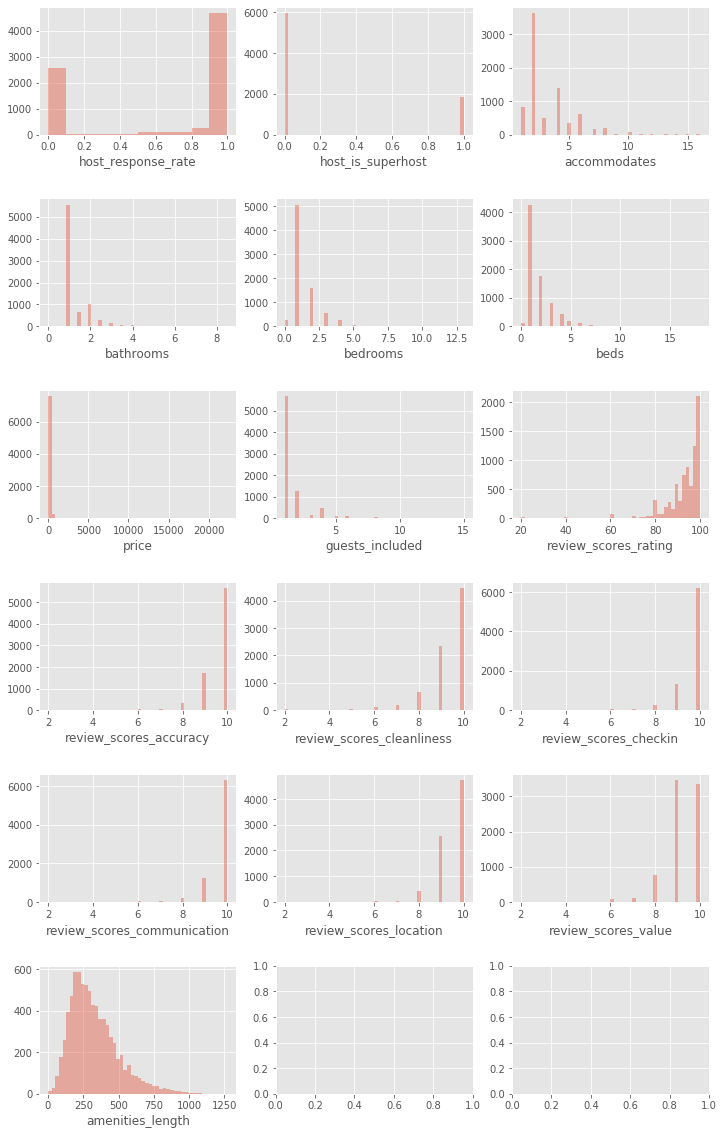

In [115]:
#Creating distribution charts for all the numbered features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = listings_final.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

graphs = len(numdf_variables)-1

position = []
for i in range(6):
    for j in range(3):
        b = i,j
        position.append(b)
        
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

price                          1.000000
accommodates                   0.239997
bedrooms                       0.225551
bathrooms                      0.213528
beds                           0.194283
guests_included                0.101576
amenities_length               0.032944
review_scores_location         0.026195
compound                       0.009562
review_scores_cleanliness      0.006421
host_response_rate            -0.010211
review_scores_rating          -0.015529
review_scores_accuracy        -0.019835
review_scores_communication   -0.026142
review_scores_value           -0.026846
host_is_superhost             -0.029138
review_scores_checkin         -0.042687
Name: price, dtype: float64

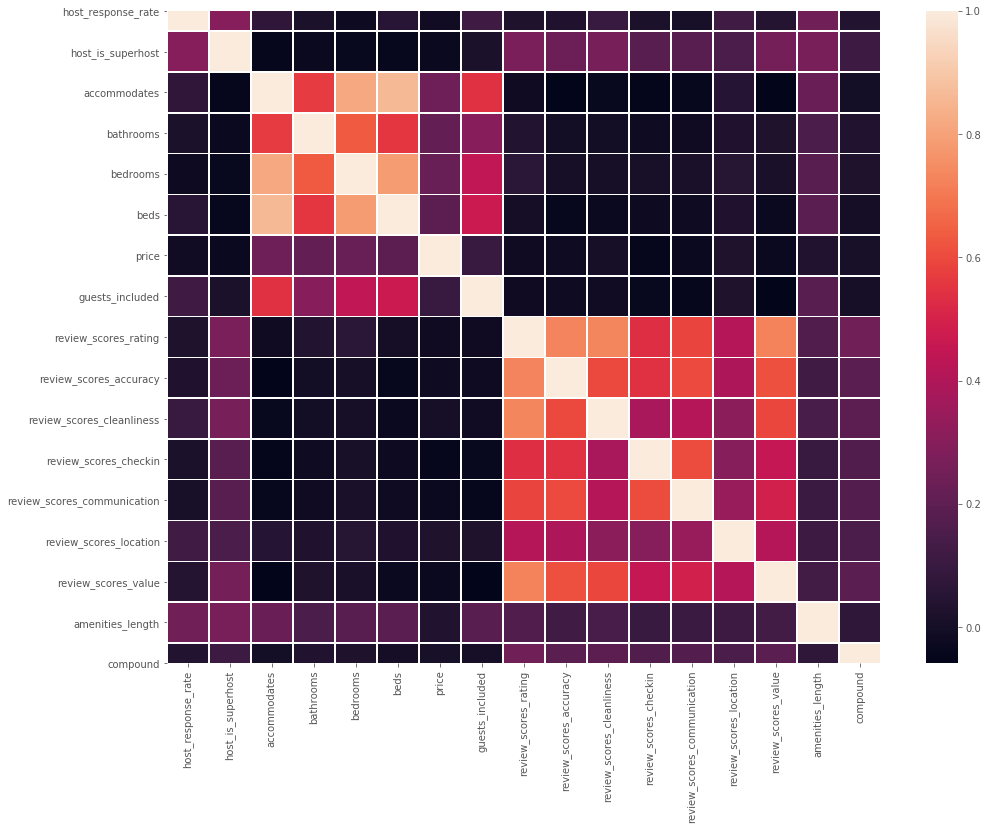

In [117]:
#Correlation Matrix with the remaining features
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [118]:
#Creating columns for the categorical fields
listings_final = pd.get_dummies(listings_final, columns=['zipcode','property_type', 'room_type', 'bed_type'])

In [119]:
listings_final.dtypes

host_response_rate        float64
host_is_superhost         float64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
                           ...   
room_type_Hotel room        uint8
room_type_Private room      uint8
room_type_Shared room       uint8
bed_type_Other              uint8
bed_type_Real Bed           uint8
Length: 2496, dtype: object

price                     1.000000
zipcode_D08 K0HD          0.495557
accommodates              0.239997
bedrooms                  0.225551
bathrooms                 0.213528
                            ...   
review_scores_value      -0.026846
room_type_Shared room    -0.027820
host_is_superhost        -0.029138
review_scores_checkin    -0.042687
room_type_Private room   -0.135506
Name: price, Length: 2496, dtype: float64

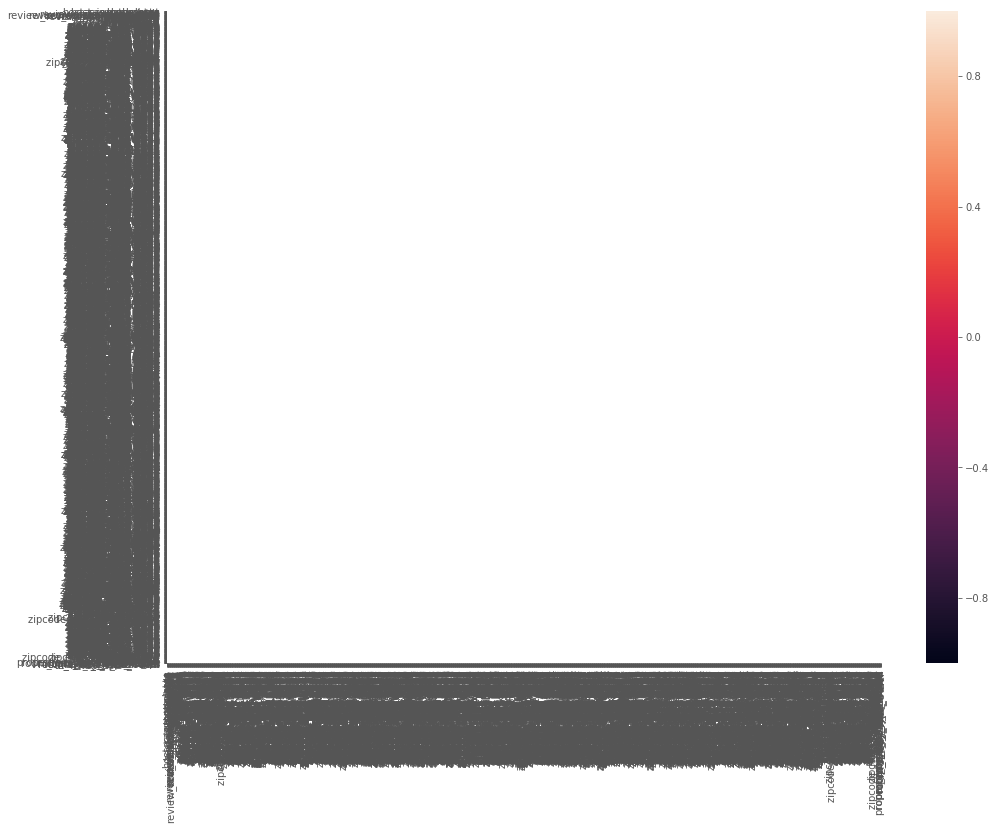

In [126]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [123]:
#Dropping rows with NAs
listings1=listings_final.dropna(subset = ['host_response_rate','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
listings1.isna().sum()

host_response_rate        0
host_is_superhost         0
accommodates              0
bathrooms                 0
bedrooms                  0
                         ..
room_type_Hotel room      0
room_type_Private room    0
room_type_Shared room     0
bed_type_Other            0
bed_type_Real Bed         0
Length: 2496, dtype: int64

In [147]:
#Creating Training / Test splits

target_name = 'price'
X = listings1.drop('price', axis=1)
y=listings1[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [148]:
#OLS Regression
Xp = X_train #Dependent variable
yp = y_train #Target outcome is price
Xp = sm.add_constant(Xp) 
ols_model = sm.OLS(yp, Xp.astype(float)).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.215
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           5.73e-08
Time:                        08:47:18   Log-Likelihood:                -47324.
No. Observations:                6652   AIC:                         9.893e+04
Df Residuals:                    4513   BIC:                         1.135e+05
Df Model:                        2138                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.9589     57.401     -0.173      0.862    -122.493     102.576
host_response_rate            -16.0317     13.772     -1.164      0.244     -43.031      10.967
host_is_superhost              -5.8440     16.029     -0.365      0.715     -37.268      25.580
accommodates                   39.3002      6.857      5.731      0.000      25.857      52.743
bathrooms                      71.4794     12.535      5.702      0.000      46.905      96.054
bedrooms                       34.7639     13.362      2.602      0.009       8.569      60.959
beds                          -23.2913      8.472     -2.749      0.006     -39.900      -6.682
guests_included               -16.2277      5.621     -2.887      0.004     -27.248      -5.208
review_scores_rating            0.2420      1.301      0.186      0.852      -2.309       2.793
review_scores_accuracy          0.2282     11.055      0.021      0.984     -21.444      21.901
review_scores_cleanliness      13.4526      8.039      1.673      0.094      -2.309      29.214
review_scores_checkin         -26.7383     10.950     -2.442      0.015     -48.206      -5.271
review_scores_communication     2.0833     11.621      0.179      0.858     -20.699      24.866
review_scores_location         14.3229      8.950      1.600      0.110      -3.223      31.869
review_scores_value            -5.8968      9.505     -0.620      0.535     -24.532      12.738
amenities_length               -0.0345      0.036     -0.965      0.335      -0.105       0.036
compound                       -4.2059     13.144     -0.320      0.749     -29.974      21.562
zipcode_-                      -4.6403    361.794     -0.013      0.990    -713.934     704.654
zipcode_.                      25.9141    362.633      0.071      0.943    -685.024     736.852
zipcode_......               -118.2439    363.346     -0.325      0.745    -830.580     594.093
zipcode_/                     -24.8373    361.608     -0.069      0.945    -733.765     684.091
zipcode_0                      16.7331     93.730      0.179      0.858    -167.023     200.489
zipcode_00-000                 21.2088    361.897      0.059      0.953    -688.287     730.704
zipcode_1                      -2.6498     63.472     -0.042      0.967    -127.085     121.786
zipcode_10                    -63.1114    361.718     -0.174      0.861    -772.257     646.034
zipcode_10710                 -82.5057    361.674     -0.228      0.820    -791.564     626.553
zipcode_11                    -91.8923    181.084     -0.507      0.612    -446.906     263.122
zipcode_12                    -84.4848    129.217     -0.654      0.513    -337.813     168.843
zipcode_12RW30                -45.6769    361.727     -0.126      0.900    -754.839     663.485
zipcode_13 

In [150]:
#Using OLS regression from sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

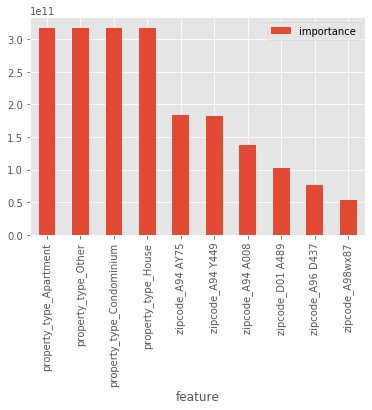

In [151]:
#Checking for features with most importance
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [152]:
#OLS mean squared error on test dataset 
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse

10524319535.667906

In [153]:
ols_r2 = metrics.r2_score(y_test, ols_y_predict)
ols_r2

-7863175344865121.0

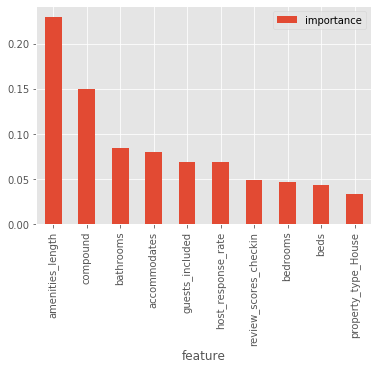

In [154]:
#Creating decision tree model
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Checking for important features
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [155]:
#Decision Tree mean squared error on test dataset
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

1965.4610401916068

In [156]:
dtree_r2 = metrics.r2_score(y_test, dtree_y_predict)
dtree_r2

-273.24504426980906

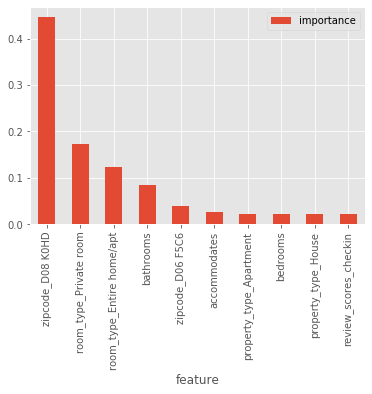

In [157]:
#Creating random forest model
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [158]:
#Get Random Forest mean squared error on test dataset
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

102.51082211492623

In [159]:
rf_r2 = metrics.r2_score(y_test, rf_y_predict)
rf_r2

0.2539819382185503

In [160]:
print("OLS MSE",ols_mse)
print("Decision Tree MSE:", dtree_mse)
print("Random Forest MSE:", rf_mse)

OLS MSE 10524319535.667906
Decision Tree MSE: 1965.4610401916068
Random Forest MSE: 102.51082211492623


In [161]:
print("OLS R^2",ols_r2)
print("Decision Tree R^2:", dtree_r2)
print("Random Forest R^2:", rf_r2)

OLS R^2 -7863175344865121.0
Decision Tree R^2: -273.24504426980906
Random Forest R^2: 0.2539819382185503
